In [1]:
!pip install tensorflow tensorflow_hub matplotlib


In [2]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Image upload
from google.colab import files
uploaded = files.upload()


Saving your_style_image.jpg to your_style_image.jpg
Saving your_content_image.jpg to your_content_image.jpg


In [4]:
# Load and preprocess image
def load_and_process_image(filename):
    max_dim = 512
    img = Image.open(filename)
    img = img.convert('RGB')
    img.thumbnail((max_dim, max_dim))
    img = np.array(img) / 255.0
    img = img.astype(np.float32)
    return tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# Replace with the actual uploaded filenames
content_image = load_and_process_image("your_content_image.jpg")
style_image = load_and_process_image("your_style_image.jpg")

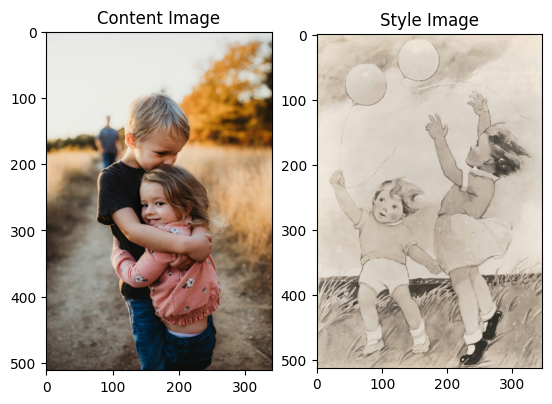

In [5]:
# Display the images
plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(content_image))
plt.title("Content Image")

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(style_image))
plt.title("Style Image")
plt.show()

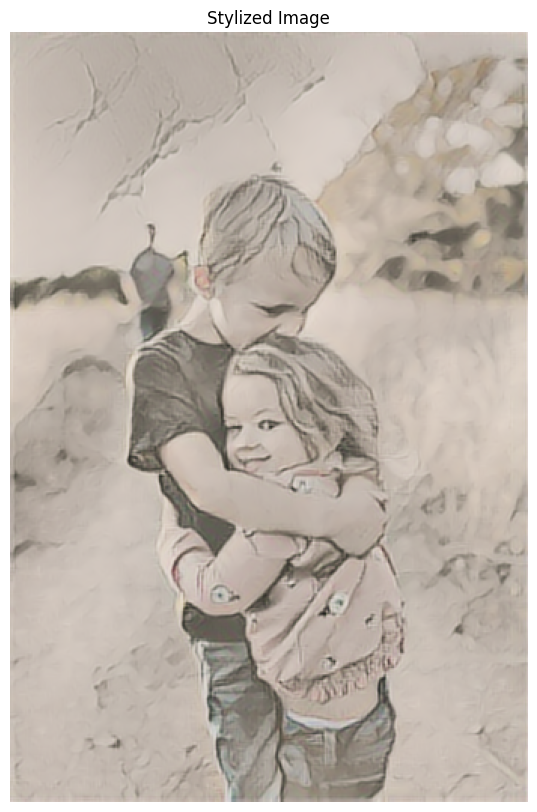

In [6]:
import tensorflow_hub as hub

# Load the TF Hub model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Stylize the content image using the style image
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(stylized_image))
plt.title("Stylized Image")
plt.axis('off')
plt.show()


In [7]:
# Convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    return Image.fromarray(tensor)

# Convert and save
output_image = tensor_to_image(stylized_image)
output_path = 'stylized_output.jpg'
output_image.save(output_path)

# Download link (for Colab)
from google.colab import files
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Image upload
from google.colab import files
uploaded = files.upload()


Saving ghibli.jpg to ghibli.jpg
Saving sketch.jpg to sketch.jpg
Saving picasso.jpg to picasso.jpg
Saving vangogh.jpg to vangogh.jpg


In [9]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 132.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [10]:
import streamlit as st
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
from PIL import Image
import io

In [38]:
%%writefile style_transfer_app.py
import streamlit as st
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
from PIL import Image
import os

st.title("🎨 Art Style Transfer")
st.write("Upload a content image and choose your style: upload your own or pick from popular artists!")

# Load TF Hub model
@st.cache_resource
def load_model():
    return hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

model = load_model()

# Preloaded styles (must exist in same directory)
preloaded_styles = {
    "Van Gogh": "vangogh.jpg",
    "Picasso": "picasso.jpg",
    "Ghibli art": "ghibli.jpg",
    "Sketch": "sketch.jpg"
}

# Load and process image
def load_image(image_file):
    img = Image.open(image_file).convert("RGB")
    img = img.resize((512,512))
    img = np.array(img) / 255.0
    return tf.constant(img[np.newaxis, ...], dtype=tf.float32)

# Upload content image
content_file = st.file_uploader("Upload Content Image", type=["jpg", "png"])

# Toggle for style selection
use_uploaded_style = st.radio("Choose Style Input Method:", ("Upload Style Image", "Use Preloaded Style"))

style_image = None

# Upload or select style
if use_uploaded_style == "Upload Style Image":
    style_file = st.file_uploader("Upload Style Image", type=["jpg", "png"])
    if style_file:
        style_image = load_image(style_file)
        st.image(style_file, caption="Style Image", width=256)
else:
    selected_style = st.selectbox("Choose a Preloaded Style", list(preloaded_styles.keys()))
    style_path = preloaded_styles[selected_style]
    if os.path.exists(style_path):
        style_image = load_image(style_path)
        st.image(style_path, caption=f"Style: {selected_style}", width=256)
    else:
        st.error(f"Missing style file: {style_path}. Make sure it's in the same folder.")

# Show content image
if content_file:
    content_image = load_image(content_file)
    st.image(content_file, caption="Content Image", width=256)

    # Stylize button
    if style_image is not None and st.button("Stylize"):
        output = model(content_image, style_image)[0]
        stylized = tf.clip_by_value(output, 0.0, 1.0).numpy()[0]
        st.image(stylized, caption="Stylized Output", use_container_width=True)


Overwriting style_transfer_app.py


In [14]:
!pip install pyngrok

In [ ]:
!ngrok config add-authtoken -add your token here

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [39]:
!streamlit run style_transfer_app.py --server.port=8501 --server.headless=true &>/content/log.txt &


In [40]:
from pyngrok import ngrok

# Kill existing tunnels
ngrok.kill()


In [41]:
# Create new tunnel
public_url = ngrok.connect(8501)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://7578-34-125-26-115.ngrok-free.app" -> "http://localhost:8501"
